In [1]:
#all the imports here
import math
import random
from copy import deepcopy
import time
from matplotlib import pyplot as plt
inital_time=time.process_time();
total_sum=0
for x in range(10**6):
    total_sum=total_sum+x;
add_time=(time.process_time()-inital_time)
inital_time=time.process_time();
num1=2340000
num2=3230000
y=0
for x in range(1,10**6):
    y=num2/num1;
div_time = (time.process_time()-inital_time)
inital_time=time.process_time();
num1=230
num2=344
y=0
for x in range(1,10**6):
    y=num2*num1;
mul_time = (time.process_time()-inital_time)

In [2]:
# random number generator function
def customRandomNumber(a,b,t):
    if(t=="rank"):
        return random.randrange(a,b)
    if(a==0 and b==0):
        return random.random()
    else:
#                 return random.randrange(a,b)
        return random.uniform(a,b)



In [3]:
def roundto_d_significant(value, sig_digits):
    if value == 0:
        return 0
    else:
        return round(value, sig_digits - int(math.floor(math.log10(abs(value)))) - 1)

In [4]:
# generate random matrix
def randomMatrix(matrixROW,elementRangeStart,elementRangeEnd,sig_digits):
    matrix=[[ 0 for x in range(matrixROW)] for y in range(matrixROW)]
    for x in range(matrixROW): 
             for y in range(matrixROW): 
                 matrix[x][y] = roundto_d_significant(customRandomNumber(elementRangeStart,elementRangeEnd,''),sig_digits)
    return matrix



In [5]:
#Ax=C
def C_Matrix(matrixROW,elementRangeStart,elementRangeEnd,sig_digits):
    matrix=[[0 for x in range(1)]  for y in range(matrixROW) ]
    for y in range(matrixROW): 
        matrix[y][0] = roundto_d_significant(customRandomNumber(elementRangeStart,elementRangeEnd,''),sig_digits)
    return matrix
  

In [6]:
# without pivioitng
def forwardElimination(mat,C_matrix,sig_digits,matrixROW,isPivot):
    # Create augmented matrix
    add=0;
    multiply=0;
    divide=0;
    for i in range(len(mat)):
        mat[i].append(mat[i][0])


    
    # start elimination forward style
    for totalLoops in range(matrixROW-1):  # for pivot element
        if(isPivot=="true"):
            currentMax=mat[totalLoops][totalLoops]
            j=totalLoops;
            for row in range(len(mat)):
                if(abs(currentMax)<abs(mat[row][totalLoops]) and row>totalLoops):
                    currentMax=mat[row][totalLoops]
                    j=row
            if(j!=totalLoops):
                temp=mat[totalLoops]
                mat[totalLoops]=mat[j]
                mat[j]=temp
        for row in range(len(mat)):
            if(mat[row][totalLoops]==0):
                pass
            else:
                newCol=mat[row][totalLoops]
                if(row>totalLoops):
                    divide=divide+1;

                for coloumn in range(len(mat[row])):
                    if(row<=totalLoops or mat[totalLoops][totalLoops] ==0):
                        continue
                    else:
                        mat[row][coloumn]=roundto_d_significant((mat[row][coloumn]-(newCol * (mat[totalLoops][coloumn]/mat[totalLoops][totalLoops]))) ,sig_digits)
                        add=add+1;
                        multiply=multiply+1;
                             

    
    return [mat,add,multiply,divide] #Auguemented resultant from forward matrix

    

In [7]:
def backWardElimination(matrix,C_matrix,sig_digits,matrixROW):
    b=[[0 for x in range(1)]  for y in range(matrixROW) ];
    add_Count=0;
    multiply=0;
    divide=0;
    length_of_column=len(matrix[0])
    for x in reversed(range(matrixROW)):
        a=0;
        for j in reversed(range(length_of_column)):
            if(length_of_column-1==j):
                a=roundto_d_significant(matrix[x][j],sig_digits)
            elif(x==j):
                a=roundto_d_significant(a/matrix[x][j],sig_digits)
                divide=divide+1
            elif(j<matrixROW and j>=x):
                 a = roundto_d_significant(a - matrix[x][j]*b[j][0],sig_digits) 
                 add_Count=add_Count+1
                 multiply=multiply+1
        b[x][0]=a

    return [add_Count,multiply,divide]
    
                
            

In [8]:
def  gausianElimination(rowRangeStart,rowRangeEnd,elementRangeStart,elementRangeEnd,sig_digits,t):
        matrixROW=t
        if(t>0):
            matrixRow=t
        else:
            matrixROW =customRandomNumber(rowRangeStart,rowRangeEnd,'rank')
        matr = randomMatrix(matrixROW,elementRangeStart,elementRangeEnd,sig_digits)
        Cmatrix = C_Matrix(matrixROW,elementRangeStart,elementRangeEnd,sig_digits)
        new_matrix=deepcopy(matr)
        #without pivot
#         withPivotMatrix = forwardElimination(matr,Cmatrix,sig_digits,matrixROW,"false");
        withPivotMatrix = forwardElimination(new_matrix,Cmatrix,sig_digits,matrixROW,"true");
        solutionmatrixwithpivot=backWardElimination(withPivotMatrix[0],Cmatrix,sig_digits,matrixROW)

        return [withPivotMatrix[1]+solutionmatrixwithpivot[0],
               withPivotMatrix[2]+solutionmatrixwithpivot[1],
               withPivotMatrix[3]+solutionmatrixwithpivot[2]]

In [9]:
matrix_time=[[ 1 for j in range(2)] for y in range(10)]
time_mat=[0 for y in range(10)]
n_mat=[0 for y in range(10)]
def rankOfMatrix():
    print(matrix_time)
    for x in range(100,1100,100):
        i=0
        real_time=time.process_time();
        m=gausianElimination(3,4,-9,9,5,x)
        actual_time=time.process_time()-real_time;
        z=[(x**2+x)/2, (2*(x**3)+3*(x**2)-5*x)/6]
        print("for matrix for ",x,m,z)
        matrix_time[i][0]=(z[1]*add_time+z[1]*mul_time+z[0]*div_time)/10**6
        matrix_time[i][1]=actual_time
        print("practicle_time",matrix_time[i][0])
        print("real_time",actual_time)
        time_mat[i]=math.log10(actual_time)
        n_mat[i]=math.log10(x)
        i=i+1;
    plt.title("With Pivot") 
    plt.xlabel("log(n)") 
    plt.ylabel("log(Tn)") 
    plt.plot(time_mat,n_mat) 
    plt.show()
    

    


[[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
for matrix for  100 [504900, 504900, 5050] [5050.0, 338250.0]
practicle_time 0.059673508599999994
real_time 0.46086899999999975
for matrix for  200 [4019800, 4019800, 20100] [20100.0, 2686500.0]
practicle_time 0.47233785719999993
real_time 3.5463069999999997
for matrix for  300 [13544700, 13544700, 45150] [45150.0, 9044750.0]
practicle_time 1.5884270457999998
real_time 12.047148
for matrix for  400 [32079600, 32079600, 80200] [80200.0, 21413000.0]
practicle_time 3.7583750743999995
real_time 27.937763
for matrix for  500 [62624500, 62624500, 125250] [125250.0, 41791250.0]
practicle_time 7.332615942999998
real_time 56.114235
for matrix for  600 [108179400, 108179400, 180300] [180300.0, 72179500.0]
practicle_time 12.661583651599996
real_time 93.47753800000001
for matrix for  700 [171744300, 171744300, 245350] [245350.0, 114577750.0]
practicle_time 20.095712200199998
real_time 148.769916
for matrix for  800 [2

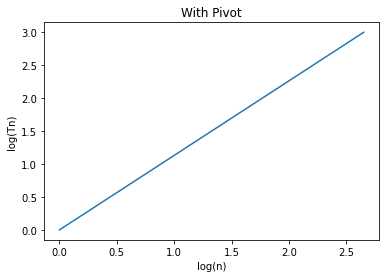

In [10]:
rankOfMatrix()